# This is a sample code for simple trading strategy using 2 simple moving averages (SMA) convergence.

In [31]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [32]:
df = yf.download('ICICIBANK.NS', period = '1000d', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-11,380.600006,381.200012,375.250000,378.549988,373.369293,12537973
2019-01-14,378.700012,378.700012,372.700012,373.350006,368.240479,14844029
2019-01-15,373.549988,375.399994,370.600006,372.750000,367.648682,12960779
2019-01-16,372.049988,379.750000,372.049988,375.299988,370.163788,15106484
2019-01-17,376.000000,377.950012,372.799988,374.600006,369.473389,13171721


## EDA

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-11 to 2023-01-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1000 non-null   float64
 1   High       1000 non-null   float64
 2   Low        1000 non-null   float64
 3   Close      1000 non-null   float64
 4   Adj Close  1000 non-null   float64
 5   Volume     1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 54.7 KB


In [35]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,583.280999,590.183151,576.029399,583.179199,579.243626,2.150196e+07
std,184.142217,184.680085,183.592763,184.213831,184.877497,1.698111e+07
min,284.000000,297.899994,268.299988,284.000000,281.481689,3.149310e+06
25%,407.000000,412.474998,400.399994,407.650009,402.924683,1.155283e+07
50%,549.299988,552.075012,540.125000,547.500000,542.645172,1.659773e+07
75%,731.099991,739.349991,721.362518,730.112488,725.757248,2.562732e+07
max,956.000000,958.200012,941.000000,952.900024,952.900024,2.868577e+08


In [36]:
df.resample('M').mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,367.776668,371.676668,362.420001,366.496665,361.480945,2.234279e+07
2019-02-28,350.221053,354.102634,346.189472,349.757891,344.971244,1.462270e+07
2019-03-31,382.216666,387.244444,379.433331,384.583332,379.320082,1.886126e+07
2019-04-30,397.494738,401.207894,392.521052,396.644737,391.216418,1.322430e+07
2019-05-31,401.902274,408.304547,396.761361,401.754544,396.256295,2.307944e+07


## Calculating returns

In [37]:
daily_close = df[['Adj Close']]

In [38]:
daily_return = daily_close.pct_change()

In [39]:
daily_return.fillna(0, inplace = True)

In [40]:
print(daily_return)

            Adj Close
Date                 
2019-01-11   0.000000
2019-01-14  -0.013737
2019-01-15  -0.001607
2019-01-16   0.006841
2019-01-17  -0.001865
...               ...
2023-01-19  -0.003853
2023-01-20   0.004849
2023-01-23   0.001551
2023-01-24  -0.001090
2023-01-25  -0.017743

[1000 rows x 1 columns]


In [41]:
new_df = df.resample('M').apply(lambda x:x[-1])
monthly_return = new_df.pct_change()

In [42]:
monthly_return.fillna(0,inplace=True)

In [43]:
monthly_return.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-02-28,-0.065066,-0.066109,-0.025699,-0.039237,-0.039237,-0.786456
2019-03-31,0.127134,0.142573,0.138406,0.143938,0.143938,0.260007
2019-04-30,0.038192,0.019657,0.026862,0.017351,0.017351,-0.161866
2019-05-31,0.047210,0.049780,0.027275,0.039755,0.039755,0.271961


## Mean using Rolling ()

In [44]:
ad_price = df["Adj Close"]

In [45]:
mav = ad_price.rolling(window=50).mean()

In [46]:
print(mav[-10:])

Date
2023-01-12    909.772002
2023-01-13    909.068002
2023-01-16    908.267002
2023-01-17    907.220002
2023-01-18    906.400002
2023-01-19    905.509003
2023-01-20    904.785002
2023-01-23    904.320002
2023-01-24    903.501002
2023-01-25    902.335002
Name: Adj Close, dtype: float64


<AxesSubplot:xlabel='Date'>

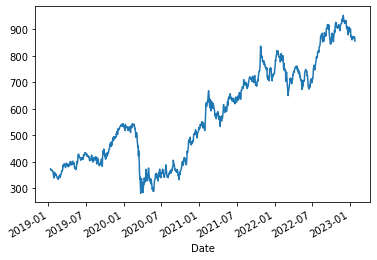

In [47]:
ad_price.plot()

<AxesSubplot:xlabel='Date'>

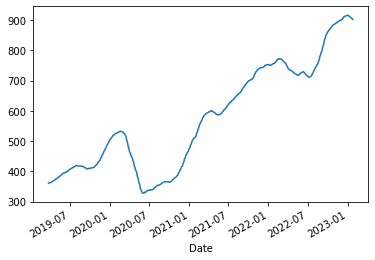

In [48]:
mav.plot()

In [49]:
short_l = 20
long_l = 80

In [50]:
signal_df = pd.DataFrame(index= df.index)
signal_df['signal']=0.0

In [51]:
signal_df['short_mav'] = df['Adj Close'].rolling(window = short_l, min_periods=1, center = False).mean()

In [52]:
signal_df['long_mav'] = df['Adj Close'].rolling(window = long_l, min_periods=1, center = False).mean()

In [53]:
signal_df['signal'][short_l:] = np.where(signal_df['short_mav'][short_l:]>signal_df['long_mav'][short_l:], 1.0, 0.0)

In [54]:
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions']==-1.0]

,signal,short_mav,long_mav,positions
Date,,,,
2019-08-23,0.0,410.373557,410.445087,-1.0
2020-03-06,0.0,522.227837,522.509694,-1.0
2020-10-01,0.0,359.991808,360.499760,-1.0
2021-04-15,0.0,571.246802,573.132422,-1.0
2021-12-20,0.0,732.571362,734.291666,-1.0
2022-03-03,0.0,756.892905,759.694224,-1.0
2022-06-14,0.0,720.369580,720.445998,-1.0
2022-06-17,0.0,717.655869,717.827959,-1.0
2023-01-06,0.0,900.880002,903.271876,-1.0


## plotting

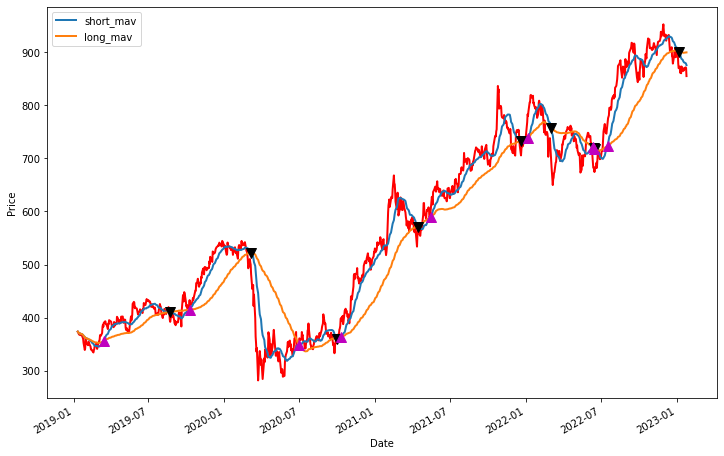

In [55]:
fig = plt.figure()
plt1 = fig.add_subplot(111, ylabel = 'Price')
df['Adj Close'].plot(ax=plt1, color='r', lw=2.)
signal_df[['short_mav', 'long_mav']].plot(ax = plt1, lw=2, figsize=(12,8))
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index, signal_df.short_mav[signal_df.positions == -1.0],'v', markersize = 10, color= 'k')
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index, signal_df.long_mav[signal_df.positions == 1.0],'^', markersize = 10, color= 'm')
plt.show()

In [56]:
signal_df

,signal,short_mav,long_mav,positions
Date,,,,
2019-01-11,0.0,373.369293,373.369293,NaN
2019-01-14,0.0,370.804886,370.804886,0.0
2019-01-15,0.0,369.752818,369.752818,0.0
2019-01-16,0.0,369.855560,369.855560,0.0
2019-01-17,0.0,369.779126,369.779126,0.0
...,...,...,...,...
2023-01-19,0.0,881.195001,899.252502,0.0
2023-01-20,0.0,880.767499,899.475002,0.0
2023-01-23,0.0,879.692499,899.752502,0.0


In [57]:
signal_df.to_csv("SMA.csv")

In [58]:
'''According to this strategy, we get into a long position (buy) when the fast moving average becomes greater than the slow
moving average. Vice versa for exiting the trade.'''

'According to this strategy, we get into a long position (buy) when the fast moving average becomes greater than the slow\nmoving average. Vice versa for exiting the trade.'